In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [2]:
# Reading the dataset
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv',low_memory=False)
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [6]:
# Neighborhood was brookln instead of Brooklyn
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [7]:

# Drop Duplicate records
df.drop_duplicates(inplace=True)

# Drop house rules and licensed columns with insufficient data
df.drop(['house_rules','license'], axis=1, inplace=True)

# Remove all the dollar signs and commas in the price and service fee columns
df['price'] = df['price'].str.replace('$','', regex=False).str.replace(',','', regex=False).str.strip()
df['service fee'] = df['service fee'].str.replace('$','', regex=False).str.replace(',','', regex=False).str.strip()

# Rename the price and service fee columns
df.rename(columns={'price':'price($)', 'service fee':'service fee($)'}, inplace=True)

# Drop All Records With Missing Values
df.dropna(inplace=True)

# Change all mismatched data types to the appropriate ones
df['price($)'] = df['price($)'].astype(float)
df['service fee($)'] = df['service fee($)'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

# Correct the spelling of 'brookln' to 'brooklyn'
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

# Get rid of the outliers in the availability 365 column data
df = df.drop(df[df['availability 365'] > 500].index)


In [ ]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price($),service fee($),minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102029,57351953,Cozy room in a 2B with backyard access,5155155913,unconfirmed,Cristina,Queens,Astoria,40.76987,-73.92679,United States,...,2018,822.0,164.0,1.0,9.0,2019-04-25,0.91,3.0,1.0,0.0
102030,57352505,An East Williamsburg Delight,71564706996,verified,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,...,2015,455.0,91.0,4.0,36.0,2018-06-27,1.28,1.0,1.0,0.0
102031,57353057,Cozy bedroom in williamsburg,83101851929,verified,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,...,2020,1078.0,216.0,1.0,58.0,2019-06-10,2.08,5.0,2.0,120.0
102032,57353610,Spacious Room w/ 2 Bed,69037598918,unconfirmed,Christine,Queens,Bayside,40.75047,-73.75349,United States,...,2007,103.0,21.0,7.0,40.0,2019-06-23,1.51,1.0,5.0,148.0


In [8]:
df.duplicated().value_counts()


,count
False,83411


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83411 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83411 non-null  object        
 1   NAME                            83411 non-null  object        
 2   host id                         83411 non-null  object        
 3   host_identity_verified          83411 non-null  object        
 4   host name                       83411 non-null  object        
 5   neighbourhood group             83411 non-null  object        
 6   neighbourhood                   83411 non-null  object        
 7   lat                             83411 non-null  float64       
 8   long                            83411 non-null  float64       
 9   country                         83411 non-null  object        
 10  country code                    83411 non-null  object        
 11  instan

In [10]:
df.describe()

,lat,long,Construction year,price($),service fee($),minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411,83411.000000,83411.000000,83411.000000,83411.000000
mean,40.727353,-73.948500,2012.488509,626.212730,125.243709,7.405366,32.276642,2019-06-08 22:01:01.027922176,1.377584,3.278776,7.032682,141.742612
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687650,-73.982110,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-26 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762595,-73.930815,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056324,0.050347,5.760870,331.787179,66.360979,28.102221,51.957777,NaN,1.751041,1.283599,29.551590,133.368399


In [11]:
# What are the different property type in the dataset?
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44163
Private room,37494
Shared room,1646
Hotel room,108


Text(0.5, 1.0, 'Property types and their count in the dataset')

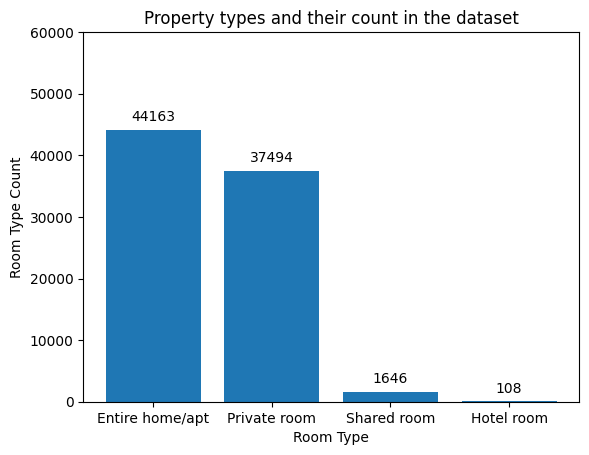

In [12]:
# Room type count plotted on a bar chart
room_type_bar = plt.bar(property_types.index,property_types.loc[:,'count'])
plt.bar_label(room_type_bar,labels = property_types.loc[:,'count'],padding=4)
plt.ylim([0,60000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property types and their count in the dataset')

In [13]:
# Which Neighborhood group have highest number of listing
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34636
Manhattan,34566
Queens,11126
Bronx,2267
Staten Island,816


Text(0.5, 1.0, 'Number of Listings in Each Neighbourhood Group')

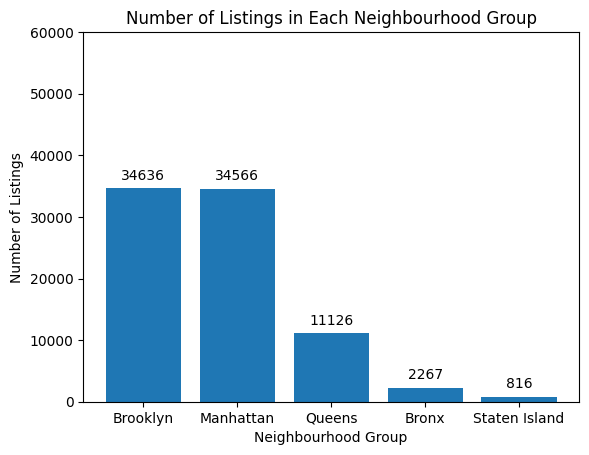

In [14]:
# Which neighbourhood group have highest number of listings
hood_group_bar = plt.bar(hood_group.index,hood_group.loc[:,'count'])
plt.bar_label(hood_group_bar,labels= hood_group.loc[:,'count'],padding=4)
plt.ylim([0,60000]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Number of Listings');
plt.title('Number of Listings in Each Neighbourhood Group')


In [ ]:
# Which neighborhood group have the highest average for Airbnb listings
avg_price = df.groupby('neighbourhood group')['price($)'].mean.sort_values(ascending=False).to_frame()
avg_price_bar = plt.bar(avg_price.index,avg_price.loc[:,'price($)']);
plt.bar_label(avg_price_bar,labels=avg_price.loc[:,'price($)'],padding=4);
plt.ylim(0,1000);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Price');
plt.xticks(rotation=45);
plt.title('Average Price of Airbnb Listings in Each Neighbourhood Group')

AttributeError: 'function' object has no attribute 'sort_values'

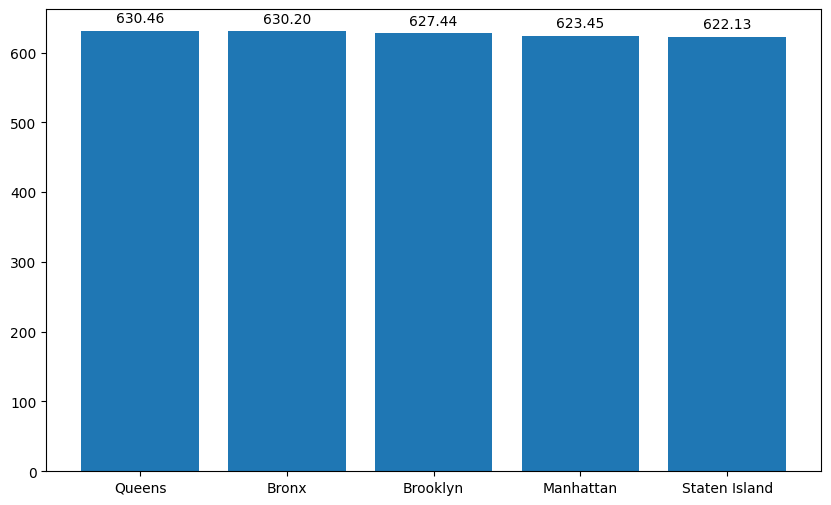

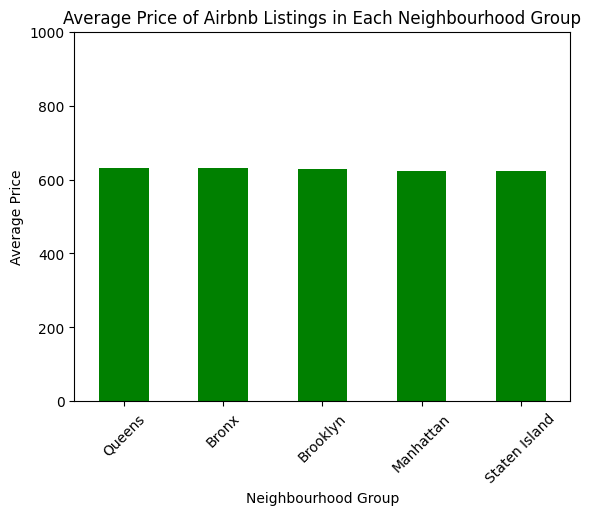

In [15]:
# Which neighborhood group have the highest average for Airbnb listings
avg_price = (
    df.groupby('neighbourhood group')['price($)']
    .mean()
    .sort_values(ascending=False)
    .to_frame()
)
plt.figure(figsize=(10, 6))  # make the plot bigger
avg_price_bar = plt.bar(avg_price.index, avg_price['price($)'])
plt.bar_label(avg_price_bar, labels=[f"{v:.2f}" for v in avg_price['price($)']], padding=4, fontsize=10)
avg_price.plot(kind='bar', color='green', legend=False);
plt.ylim(0, 1000);
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.title('Average Price of Airbnb Listings in Each Neighbourhood Group')
plt.show()


<Figure size 1000x600 with 0 Axes>

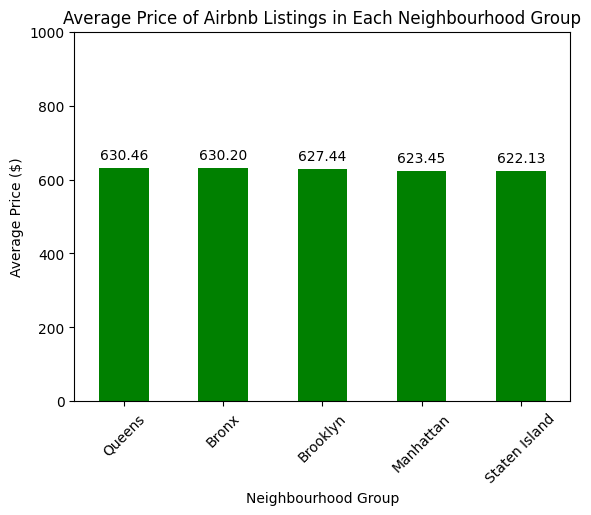

In [16]:
# Which neighborhood group have the highest average for Airbnb listings
avg_price = (
    df.groupby('neighbourhood group')['price($)']
    .mean()
    .sort_values(ascending=False)
    .to_frame()
)

plt.figure(figsize=(10, 6))
ax = avg_price.plot(kind='bar', color='green', legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=4, fontsize=10)

plt.ylim(0, 1000)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.title('Average Price of Airbnb Listings in Each Neighbourhood Group')

plt.show()


Text(0.5, 1.0, 'Relation between Construction Year and Property Price')

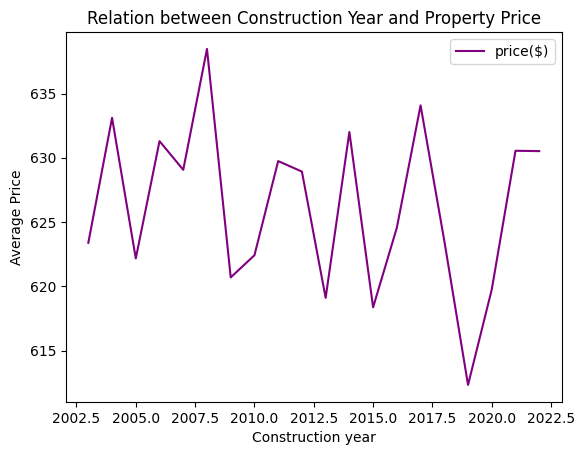

In [26]:
# Is there any relation between construction year and property price
df.groupby('Construction year')['price($)'].mean().to_frame().plot(color='purple')
plt.xlabel('Construction year')
plt.ylabel('Average Price')
plt.title('Relation between Construction Year and Property Price')



Text(0.5, 1.0, 'Top 10 Hosts by Calculated Host Listing Count')

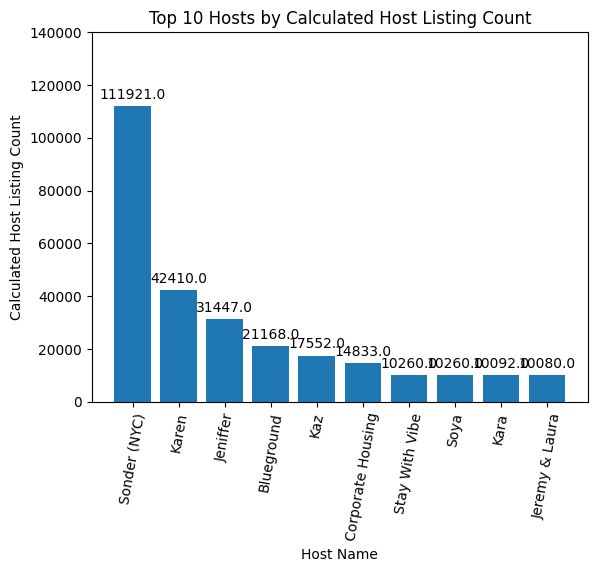

In [ ]:
# Who are the top 10 host by calculated host listing count
top_host=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
host_bar = plt.bar(top_host.index,top_host.loc[:,'calculated host listings count'])
plt.bar_label(host_bar,labels=top_host.loc[:,'calculated host listings count'],cololabel_type='edge',padding =3)
plt.xlabel('Host Name');
plt.ylabel('Calculated Host Listing Count');
plt.xticks(rotation=80);
plt.ylim(0,140000);
plt.title('Top 10 Hosts by Calculated Host Listing Count')

/tmp/ipython-input-4156245843.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_host.index, rotation=80)


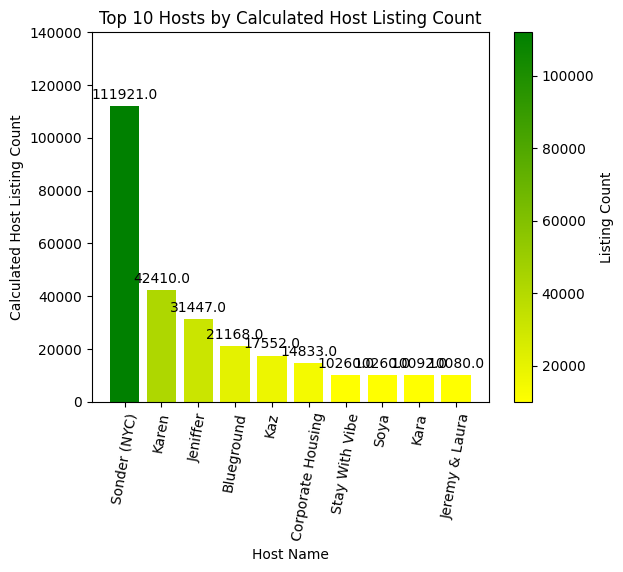

In [22]:
# Who are the top 10 host by calculated host listing count
top_host = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
values = top_host['calculated host listings count']
cmap = LinearSegmentedColormap.from_list("my_cmap", [ "yellow",'green'])
norm = plt.Normalize(values.min(), values.max())
colors = cmap(norm(values))
fig, ax = plt.subplots()  # ✅ Create figure and axes
bars = ax.bar(top_host.index, values, color=colors)
ax.bar_label(bars, labels=values, label_type='edge', padding=3)
ax.set_xlabel('Host Name'); ax.set_ylabel('Calculated Host Listing Count')
ax.set_xticklabels(top_host.index, rotation=80)
ax.set_ylim(0, 140000)
ax.set_title('Top 10 Hosts by Calculated Host Listing Count')
fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), ax=ax, label='Listing Count')  # ✅ Fixed colorbar
plt.show()


In [ ]:
# Are with host that are verified more likely to get the positive review
# Are hosts with verified identity more likely to get positive reviews
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review


,review rate number
host_identity_verified,
verified,3.284186
unconfirmed,3.273370


Text(0.5, 1.0, 'Are with host that are verified more likely to get the positive review')

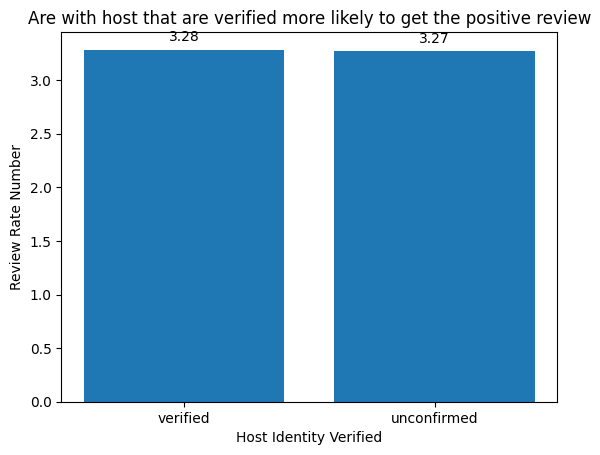

In [ ]:
review_bar = plt.bar(review.index,review.loc[:,'review rate number'])
plt.bar_label(review_bar,labels=round(review.loc[:,'review rate number'],2 ), padding = 4)
plt.xlabel('Host Identity Verified');
plt.ylabel('Review Rate Number');
plt.title('Are with host that are verified more likely to get the positive review')

In [ ]:
# Is there any correlation between price and service fees
df['price($)'].corr(df['service fee($)'])

np.float64(0.9999909074778258)

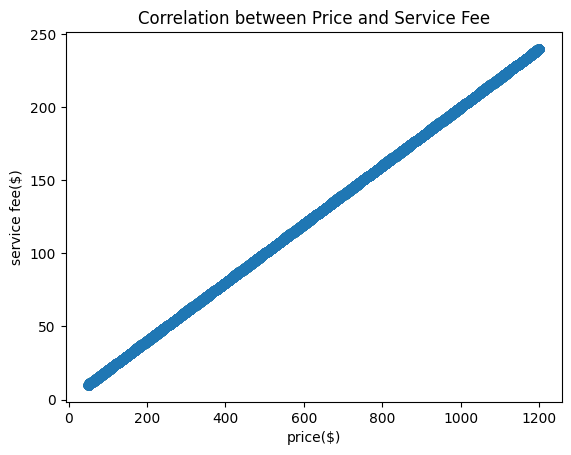

In [ ]:
sns.regplot(df,x = 'price($)', y ='service fee($)')
plt.xlabel('price($)');
plt.ylabel('service fee($)');
plt.title('Correlation between Price and Service Fee');

In [ ]:
# What is the average review rate number for listings, does it vary based on the neighborhood group and room type
ARRN = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285605
                    Shared room                3.261976
Queens              Entire home/apt            3.350045
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

Text(0.5, 1.0, 'Average Review Rate Number For Neighborhood Group and Room Type')

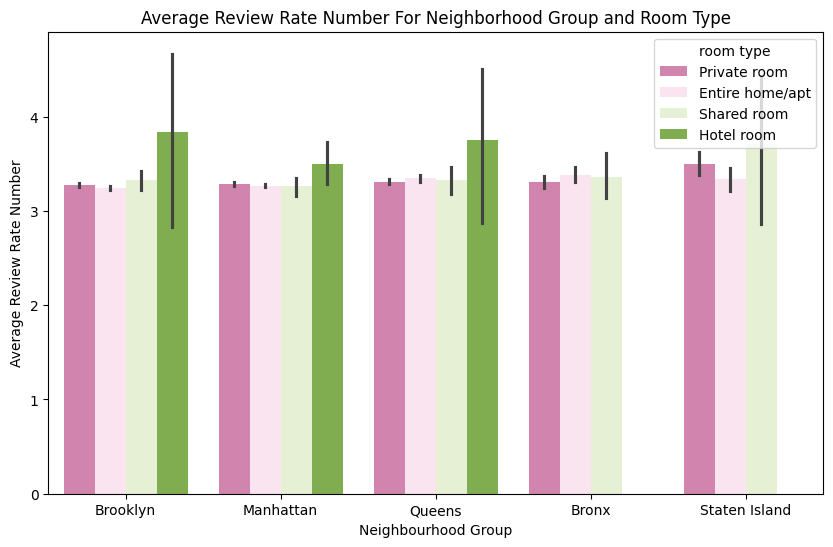

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type', palette=sns.color_palette("PiYG", n_colors=df['room type'].nunique()))
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate Number For Neighborhood Group and Room Type')


Text(0.5, 1.0, 'Are Host With Higher Calculated Host Listings Count More Likely To Maintain Higher Availability Throughout The Year')

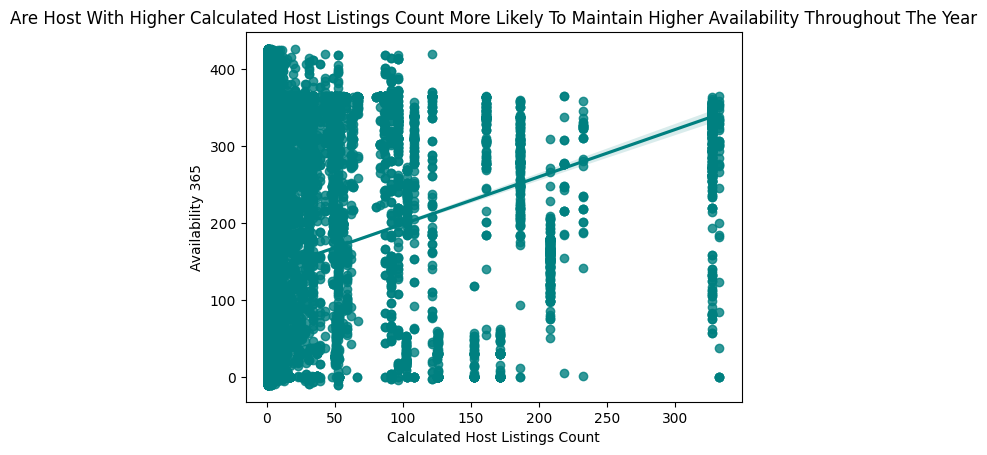

In [27]:
# are host withhigher calculated host listings count more likely to maintain higher availability throughout the year
sns.regplot(df, x='calculated host listings count', y='availability 365', color='teal')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365')
plt.title('Are Host With Higher Calculated Host Listings Count More Likely To Maintain Higher Availability Throughout The Year')


In [ ]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1359855273675869)